In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from typing import Literal

import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Helvetica")
sns.set_theme(style="white", font_scale=2)

In [4]:
SAVE_ROOT = "../test/sim_1000"

In [5]:
def get_compare_df(
    magnitude: int, param: Literal["all", "x", "y", "theta"]
) -> pd.DataFrame:
    if magnitude == 1:
        param = "all"  # For magnitude 1, we only have 'all' parameter
    file_path = os.path.join(SAVE_ROOT, f"noise_{magnitude}_{param}", "compare.pkl")
    return pd.read_pickle(file_path)


def get_error_rate_from_df(compare_df: pd.DataFrame) -> float:
    return (compare_df["true_model"] != compare_df["selected_model"]).mean()


def error_rate(magnitude: int, param: Literal["all", "x", "y", "theta"]) -> float:
    compare_df = get_compare_df(magnitude, param)
    return get_error_rate_from_df(compare_df)

In [6]:
error_rates = pd.DataFrame(
    {
        param: [error_rate(int(2**magnitude), param) for magnitude in range(5)]
        for param in ["all", "x", "y", "theta"]
    }
)
error_rates.columns = ["All", r"$\sigma_x$", r"$\sigma_y$", r"$\omega_\theta$"]

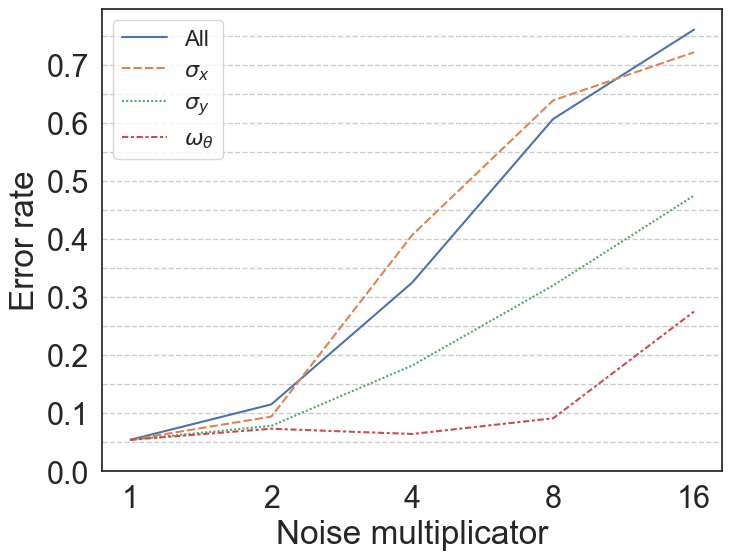

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.lineplot(error_rates, ax=ax)
# Set xticklabels
_ = plt.xticks(
    range(5),
    [f"{2**i}" for i in range(5)],
)
_ = plt.legend(fontsize=16)
_ = plt.xlabel("Noise multiplicator")
_ = plt.ylabel("Error rate")

# Add grid every 0.5
ticks = np.arange(0, 0.8, 0.05)
labels = [f"{t:.1f}" if i % 2 == 0 else "" for i, t in enumerate(ticks)]
_ = plt.yticks(ticks, labels)
_ = plt.grid(axis="y", linestyle="--")

In [8]:
fig.savefig(
    os.path.join(SAVE_ROOT, "noise_error_rate.png"),
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

In [9]:
def get_var_per_pos_df(magnitude: int, var_per_pos: int) -> pd.DataFrame:
    """
    Get the variance per position DataFrame.
    """
    if var_per_pos == 20:
        file_path = os.path.join(SAVE_ROOT, f"noise_{magnitude}_all", "compare.pkl")
    else:
        file_path = os.path.join(SAVE_ROOT, f"n_var_per_pos_{var_per_pos}_noise_{magnitude}", "compare.pkl")
    return pd.read_pickle(file_path)


def error_rate_var_per_pos_df(magnitude: int, var_per_pos: int) -> float:
    compare_df = get_var_per_pos_df(magnitude, var_per_pos)
    return get_error_rate_from_df(compare_df)

In [10]:
var_per_pos_df = pd.DataFrame(
    {
        var_per_pos: [error_rate_var_per_pos_df(int(2**log_magnitude), var_per_pos) for log_magnitude in range(5)]
        for var_per_pos in reversed([10, 15, 20])
    }
)
var_per_pos_df.columns = [f"n={var_per_pos}" for var_per_pos in reversed([10, 15, 20])]

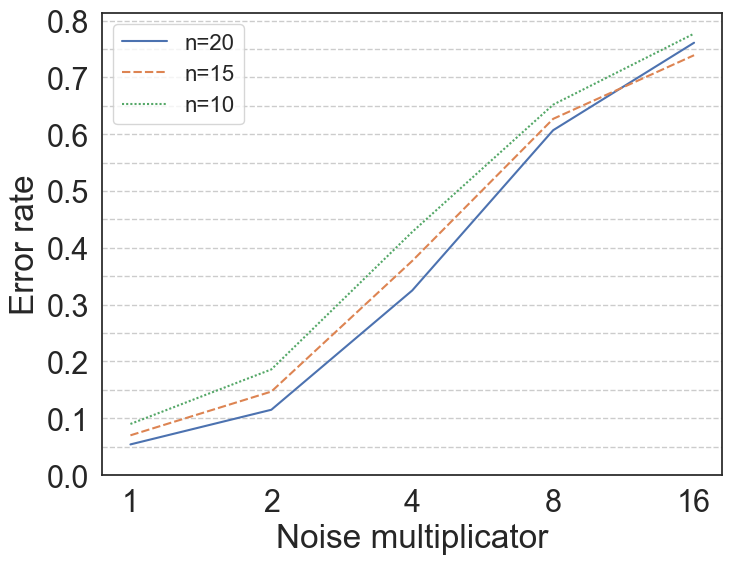

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.lineplot(var_per_pos_df, ax=ax)
# Set xticklabels
_ = plt.xticks(
    range(5),
    [f"{2**i}" for i in range(5)],
)
_ = plt.legend(fontsize=16)
_ = plt.xlabel("Noise multiplicator")
_ = plt.ylabel("Error rate")

# Add grid every 0.05
ticks = np.arange(0, 0.85, 0.05)
labels = [f"{t:.1f}" if i % 2 == 0 else "" for i, t in enumerate(ticks)]
_ = plt.yticks(ticks, labels)
_ = plt.grid(axis="y", linestyle="--")

In [12]:
fig.savefig(
    os.path.join(SAVE_ROOT, "n_var_per_pos_noise_error_rate.png"),
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)